# Initial Value Problems Exercises

````{admonition} Exercise 1.1
:class: note
:name: ex1.1

Using pen and a calculator solve the following IVP using the Euler method with a step length of $h=0.4$. Write down your solutions correct to 4 decimal places.
\begin{align*}
    y' =t + y, \qquad t\in [0,2],\qquad y(0)=2.
\end{align*}

```{dropdown} Solution (click to show)

\begin{align*}
    \mathbf{t} &= (0, 0.4, 0.8, 1.2, 1.6, 2), \\
    \\
    y_0 &= 2, \\
    y_1 &= y_0 + h(t_0 + y_0) = 2 + 0.4(0 + 2) = 2.8, \\
    y_2 &= y_1 + h(t_1 + y_1) = 2.8 + 0.4(0.4 + 2.8) = 4.08, \\
    y_3 &= y_2 + h(t_2 + y_2) = 4.08 + 0.4(0.8 + 4.08) = 6.032, \\
    y_4 &= y_3 + h(t_3 + y_3) = 6.032 + 0.4(1.2 + 6.032) = 8.9248, \\
    y_5 &= y_4 + h(t_4 + y_4) = 8.9248 + 0.4(1.6 + 8.9248) = 13.1347.
\end{align*}
```
````

````{admonition} Exercise 1.2
:class: note
:name: ex1.2

Repeat [exercise 1.1](ex1.1) using the RK2 method.

```{dropdown} Solution

\begin{align*}
    \mathbf{t} &= (0, 0.4, 0.8, 1.2, 1.6, 2), \\
    \\
    y_0 &= 2, \\
    \\
    k_1 &= t_0 + y_0 = 0 + 2 = 2, \\
    k_2 &= (t_0 + h) + (y_0 + hk_1) = (0 + 0.4) + (0 + 0.4(2)) = 3.2, \\
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 2 + \frac{0.4}{2}(2 + 3.2) = 3.04, \\
    \\
    k_1 &= t_1 + y_1 = 0.4 + 3.04 = 3.44, \\
    k_2 &= (t_1 + h) + (y_1 + hk_1) = (0.4 + 0.4) + (3.04 + 0.4(3.44)) = 5.216, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + k_2) = 3.04 + \frac{0.4}{2}(3.44 + 5.216) = 4.7712, \\
    \\
    k_1 &= t_2 + y_2 = 0.8 + 4.7712 = 5.5712, \\
    k_2 &= (t_2 + h) + (y_2 + hk_1) = (0.8 + 0.4) + (4.7712 + 0.4(5.5712)) = 8.1997, \\
    y_3 &= y_2 + \frac{h}{2}(k_1 + k_2) = 4.7712 + \frac{0.4}{2}(5.5712 + 8.1997) = 7.5254, \\
    \\
    k_1 &= t_3 + y_3 = 1.2 + 7.5254 = 8.7254, \\
    k_2 &= (t_3 + h) + (y_3 + hk_1) = (1.2 + 0.4) + (7.5254 + 0.4(8.7254)) = 12.6155, \\
    y_4 &= y_3 + \frac{h}{2}(k_1 + k_2) = 7.5254 + \frac{0.4}{2}(8.7254 + 12.6155) = 11.7936, \\
    \\
    k_1 &= t_4 + y_4 = 1.6 + 11.7936 = 13.3936, \\
    k_2 &= (t_4 + h) + (y_4 + hk_1) = (1.6 + 0.4) + (11.7936 + 0.4(13.3936)) = 19.1510, \\
    y_5 &= y_4 + \frac{h}{2}(k_1 + k_2) = 11.7936 + \frac{0.4}{2}(13.3936 + 19.1510) = 18.3025.
\end{align*}
```
````

`````{admonition} Exercise 1.3
:class: note
:name: ex1.3

Write a Python program to calculate the solutions to [exercises 1.1](ex1.1) and [1.2](ex1.2). 

````{dropdown} Solution

Code

```python
import numpy as np

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
yexact = exact(t)
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")
```

Output

```
|   t   |   Euler   |    RK2    |
|:-----:|:---------:|:---------:|
|  0.00 |  2.000000 |  2.000000 |
|  0.40 |  2.800000 |  3.040000 |
|  0.80 |  4.080000 |  4.771200 |
|  1.20 |  6.032000 |  7.525376 |
|  1.60 |  8.924800 | 11.793556 |
|  2.00 | 13.134720 | 18.302464 |
```
````
`````

In [1]:
import numpy as np

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")

|   t   |   Euler   |    RK2    |
|:-----:|:---------:|:---------:|
|  0.00 |  2.000000 |  2.000000 |
|  0.40 |  2.800000 |  3.040000 |
|  0.80 |  4.080000 |  4.771200 |
|  1.20 |  6.032000 |  7.525376 |
|  1.60 |  8.924800 | 11.793556 |
|  2.00 | 13.134720 | 18.302464 |


`````{admonition} Exercise 1.4
:class: note
:name: ex1.4

The exact solution to the IVP in [exercise 1.1](ex1.1) is $y=3e^t - t - 1$. Produce a plot of the Euler solution, the Runge-Kutta solution and the exact solution on the same set of axes.

````{dropdown} Solution

Code

```python
import matplotlib.pyplot as plt

def exact(t):
    return 3 * np.exp(t) - t - 1


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
```
Output

```{glue:} ex1.4_plot
```
````
`````

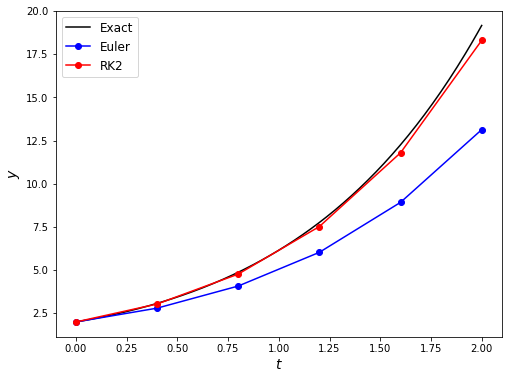

In [2]:
import matplotlib.pyplot as plt

def exact(t):
    return 3 * np.exp(t) - t - 1


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

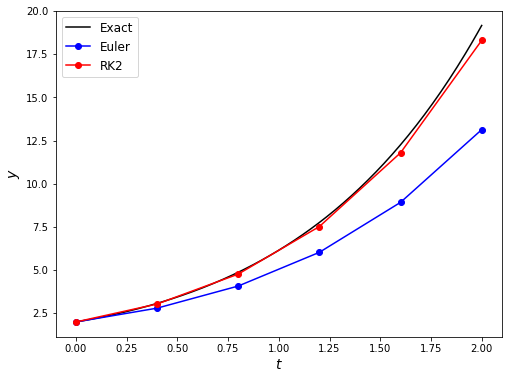

In [3]:
from myst_nb import glue
glue("ex1.4_plot", fig, display=False)

`````{admonition} Exercise 1.5
:class: note
:name: ex1.5

The motion of a pendulum can be modelled by the following ODE

\begin{align*}
    \theta'' + \frac{g}{L} \sin(\theta) = 0,
\end{align*}

where $\theta$ is the angle between the pendulum and the vertical, $L$ is the length of the pendulum and $g=9.81$ ms$^{-2}$ is the acceleration due to gravity.

```{image} Images/pendulum.png
:align: center
```

Write a Python program that uses the RK2 method with $h=0.1$ to calculate the solution for $\theta$ over the interval $t\in [0, 5]$ for a pendulum of length $L = 1$ set at an initial angle $\theta = \frac{\pi}{2}$. Produce a plot of the displacement angle $\theta$ against $t$.


````{dropdown} Solution

```python
import numpy as np
import matplotlib.pyplot as plt


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


def exact(t):
    return 3 * np.exp(t) - t - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
yexact = exact(t)
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
```

```{glue:} ex1.5_plot
```

````
`````

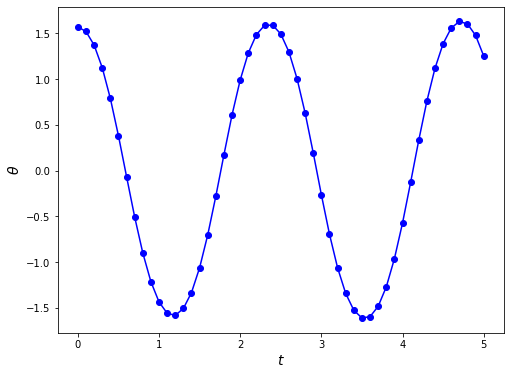

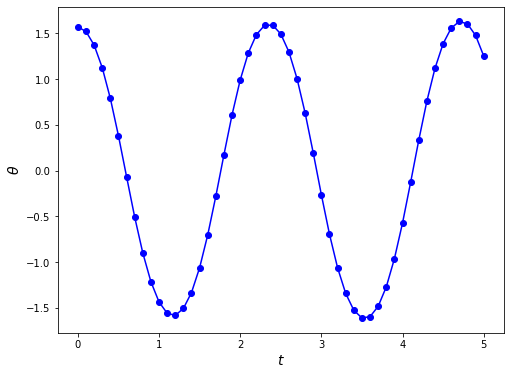

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


def exact(t):
    return 3 * np.exp(t) - t - 1


# Define IVP
tspan = [0, 5]       # boundaries of the t domain
y0 = [np.pi / 2, 0]  # solution at the lower boundary
h = 0.1              # step length
L = 1                # length
g = 9.91             # gravity

# Calculate the solution to the IVP
t, y = rk2(f, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, y[:,0], "bo-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel(r"$\theta$", fontsize=14)
plt.show()

from myst_nb import glue
glue("ex1.5_plot", fig, display=False)